<a href="https://colab.research.google.com/github/zineb99hmd/linear-regrission/blob/main/Houce_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data=pd.read_csv("kc_house_data".csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.shape

(21613, 21)

In [ ]:
data.info

<bound method DataFrame.info of                id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]>

In [ ]:
data.head

<bound method NDFrame.head of                id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freq')

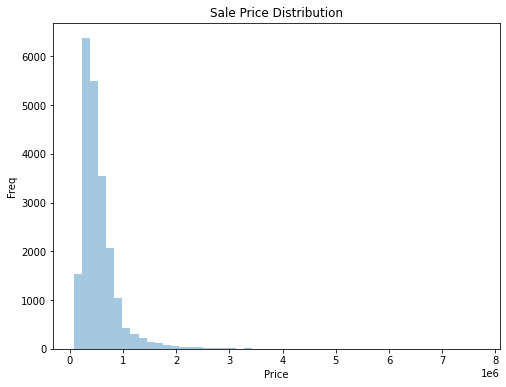

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(data['price'],kde=False,ax=ax)
plt.title('Sale Price Distribution')
plt.xlabel('Price')
plt.ylabel('Freq')

l'histogramme indique que la distribution du Price présente une asymétrie positive et j'observe que le pic est en 0.5 price

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

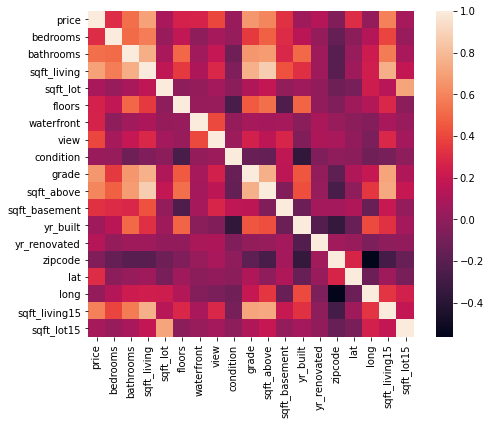

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
correlation = data.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)

j'observe que le price est fortement corrélé avec sqft_living , grade ,sqft_above et sqft_living15 par contre il est pas du tous corélé avec sqft_lot, condition ,zip_code, long et sqft_lot15



 **linear regression**

In [ ]:
espace=data['sqft_living']
price=data['price']
x=np.array(espace).reshape(-1,1)
y=np.array(price)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 62902408306.86502
R squared 0.4996528488387417


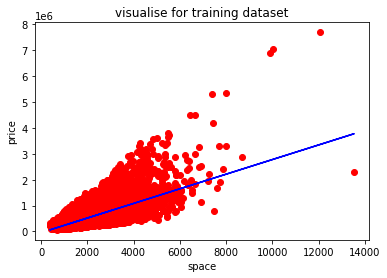

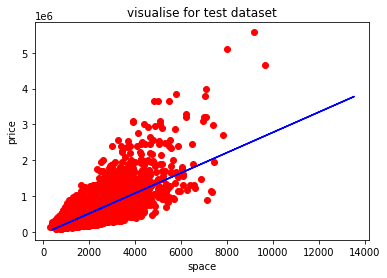

In [ ]:
espace=data['sqft_living']
price=data['price']
x=np.array(espace).reshape(-1,1)
y=np.array(price)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=40)
reg=LinearRegression()
reg.fit(xtrain,ytrain)
predicted=reg.predict(xtest)
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,reg.predict(xtrain),color='blue')
plt.title("visualise for training dataset")
plt.xlabel("space")
plt.ylabel("price")
plt.show()
plt.scatter(xtest,ytest,color='red')
plt.plot(xtrain,reg.predict(xtrain),color='blue')
plt.title("visualise for test dataset")
plt.xlabel("space")
plt.ylabel("price")
plt.show()

**multi-linear_regression**

In [ ]:

x=data[["sqft_living","sqft_lot"]]  #we have more than one input
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))



MSE 62742250513.16431
R squared 0.500926798405561


je remarque que la valeur de mse elle augmente dans multi linear et la valeur de  R squared deminuer donc Le premier (linear-reg)prédire mieux que le second(multi_linear reg )


In [ ]:
x=data[["sqft_living","sqft_lot"]]  #we have more than one input
y=data["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  56742957682.28272
R squared:  0.5486472141688182


je remarque que la valeur de mse elle deminuer  dans polynomial reg et la valeur de R squared augmente
donc le polynomial c'est le mellieure algorithme dans les 3 qui a prédire

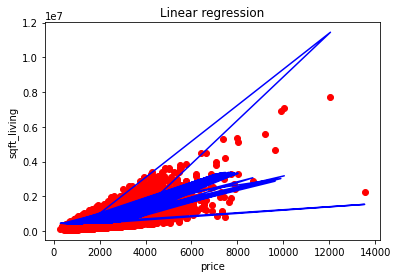

In [ ]:
x= data["sqft_living"].values.reshape(-1,1)
y= data["price"].values
poly = PolynomialFeatures(degree = 9)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
lg=LinearRegression()
lg.fit(x_poly, y)

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="blue")